In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv(f"../data/raw/approved_declined_credits_161025.csv", index_col=0)

/tmp/ipykernel_687606/2380760820.py:1: DtypeWarning: Columns (2,3,4,11,16,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/raw/approved_declined_credits_161025.csv", index_col=0)


In [3]:
df.query("id == '1000000002960'")

,trust_phone,phone_1,phone_2,phone_3,inn,passport,who_give,date_give,sex,date_birth,birthplace,marital_status,name_region,city,street,id,id_filials,id_branch_bank,name_code_credit,name_object_credit,contract_date,summa,interest_on_credit,contract_length,prev_credit_count,sum_of_prev_credits,overdue_max,total_overdue,status,bad_declined_client,cancel_comment


In [4]:
df.columns

Index(['trust_phone', 'phone_1', 'phone_2', 'phone_3', 'inn', 'passport',
       'who_give', 'date_give', 'sex', 'date_birth', 'birthplace',
       'marital_status', 'name_region', 'city', 'street', 'id', 'id_filials',
       'id_branch_bank', 'name_code_credit', 'name_object_credit',
       'contract_date', 'summa', 'interest_on_credit', 'contract_length',
       'prev_credit_count', 'sum_of_prev_credits', 'overdue_max',
       'total_overdue', 'status', 'bad_declined_client', 'cancel_comment'],
      dtype='object')

In [5]:
df.query('status == "Отказано"')['name_region'].min(), df.query('status == "Одобрено"')['name_region'].max()

('Баткенская область', 'г. Бишкек                ')

In [6]:
df.query('status == "Отказано"')['name_region']

62924     г.Бишкек (включая села, пгт.)
62925                   Чуйская область
62926     г.Бишкек (включая села, пгт.)
62927                   Чуйская область
62928     г.Бишкек (включая села, пгт.)
                      ...              
109306                  Чуйская область
109307                  Чуйская область
109308                  Чуйская область
109309                  Чуйская область
109310                   Ошская область
Name: name_region, Length: 46387, dtype: object

In [7]:
df.rename(columns={'id': 'id_credit', 'contract_date': 'contract_date_open'}, inplace=True)
df.id_credit.nunique(), df.shape[0]

(109311, 109311)

Файл содержит данные о кредитах Элдик Банка по состоянию на 03.10.2025  с суммой кредита не более 1 млн сом

Расшифровка полей:

Данные о заемщике:
- trust_phone - - наиболее "свежий" номер тел из "mib"
- phone - телефон заемщика из данных указанных в кредитном договоре
- phone_abs_1  - дополнительный телефон, возможно устаревший
- phone_abs_2 - дополнительный телефон 2, возможно устаревший
- inn  - ПИН заемщика
- passport - номер пасспрота заемщика
- who_give - подразделение выдавшее паспорт
- date_give - дата выдачи пасспорта
- sex - пол заемщика ( 1 - жен, 2 - муж )
- date_birth - дата рождения
- birthplace - место рождения
- marital_status  - семейный статус (1 - Женат/замужем, 2 - Холост/не замужем, 3- Разведен/разведена, 4 - Вдовец/вдова)

Данные о месте проживания заемщика:

- name_region - область
- city - город
- street - улица и дом

Данные о кредите:

 - id_credit - внутренний идентификационный номер кредита
 - id_filials - номер филиала
 - id_branch_bank - код сберкассы
 - name_code_credit - наименование шифра кредита
 - name_object_credit - наименование объекта кредитования
 - contract_date_open - дата открытия кредитного договора
 - summa - сумма кредита
 - interest_on_credit - процент по кредиту
 - contract_length - срок договора
 - prev_credit_count - количество кредитов в истории на момент взятия данного кредита (если ранее кредитов в нашем банке не было - могут стоять значения 0 или Nan)
 - sum_of_prev_credits - сумма кредитов  в истории на момент взятия текущего кредита (если ранее кредитов в нашем банке не было - сумма будет 0 или Nan)
 - overdue_max - разовая максимальная просрочка
 - total_overdue - суммарная просрочка по кредиту

In [8]:
df.shape

(109311, 31)

In [9]:
# быстрый осмотр значений
print("overdue_max dtype / unique (sample):", df['overdue_max'].dtype, pd.Series(df['overdue_max']).dropna().unique()[:20])
print("total_overdue dtype / unique (sample):", df['total_overdue'].dtype, pd.Series(df['total_overdue']).dropna().unique()[:20])
display(df[['overdue_max','total_overdue']].describe())
display(df.loc[df['overdue_max'].notna()].head(10))

overdue_max dtype / unique (sample): float64 [0.000e+00 3.000e+00 1.400e+01 2.438e+03 1.000e+01 2.000e+00 1.000e+00
 6.000e+00 5.000e+00 2.000e+01 4.000e+00 1.500e+01 3.500e+01 9.000e+00
 1.700e+01 7.000e+00 1.300e+01 1.200e+01 2.700e+01 8.000e+00]
total_overdue dtype / unique (sample): float64 [0.000e+00 3.000e+00 1.400e+01 2.438e+03 1.000e+01 2.000e+00 1.000e+00
 6.000e+00 5.000e+00 2.000e+01 4.000e+00 1.500e+01 3.500e+01 9.000e+00
 1.700e+01 7.000e+00 1.300e+01 8.000e+00 1.200e+01 3.200e+01]


,overdue_max,total_overdue
count,62924.000000,62924.000000
mean,9.529289,11.069147
std,89.096250,90.513916
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,4.000000,4.000000
max,5693.000000,5693.000000


,trust_phone,phone_1,phone_2,phone_3,inn,passport,who_give,date_give,sex,date_birth,birthplace,marital_status,name_region,city,street,id_credit,id_filials,id_branch_bank,name_code_credit,name_object_credit,contract_date_open,summa,interest_on_credit,contract_length,prev_credit_count,sum_of_prev_credits,overdue_max,total_overdue,status,bad_declined_client,cancel_comment
0,NaN,0772529356 0557,NaN,NaN,10101194902445,AN4279692,МКК50-19,2015-09-25,Женщина,1949-01-01,NaN,Вдовец/Вдова,Иcсык-Кульская область,г.Карако,"мкр Восход,дом.15,кв.2",1800000002501,18.0,0.0,Торговля и коммерческие операции,Торгово-закупочная деятельность,2023-03-29,1000000.0,0.0,36.0,0.0,0.0,0.0,0.0,Одобрено,0,NaN
1,9.967002e+11,0700205385,NaN,NaN,10101195302746,AN0798149,ИИМ50-10,2008-04-10,Женщина,1953-01-01,NaN,Вдовец/Вдова,Таласская область,с. Кокой,ул. Манас №43,2000000003107,20.0,0.0,Сельское хозяйство,Растениеводство,2022-08-25,85000.0,6.0,17.0,0.0,0.0,3.0,3.0,Одобрено,0,NaN
2,9.967002e+11,0700205385,NaN,NaN,10101195302746,AN0798149,ИИМ50-10,2008-04-10,Женщина,1953-01-01,NaN,Вдовец/Вдова,Таласская область,с. Кокой,ул. Манас №43,2000000003108,20.0,0.0,Сельское хозяйство,Животноводство,2022-08-25,85000.0,6.0,17.0,0.0,0.0,14.0,14.0,Одобрено,0,NaN
3,NaN,0990288871,NaN,NaN,10101195303139,AN4751110,МКК50-37,2016-12-05,Женщина,1953-01-01,NaN,Вдовец/Вдова,Джалал-Абадская область,с. Кызыл-,нет,3600000001828,36.0,0.0,Сельское хозяйство,Животноводство,2014-12-22,500000.0,25.0,36.0,0.0,0.0,2438.0,2438.0,Одобрено,0,NaN
4,NaN,0704608121,NaN,NaN,10101195400720,AN2737017,МКК50-14,2012-02-27,Женщина,1954-01-01,NaN,Женат(Замужем),Иcсык-Кульская область,Кытай,Текебаев Сабыр №15,1600000002980,16.0,0.0,Сельское хозяйство,Животноводство,2023-04-12,300000.0,6.0,36.0,0.0,0.0,0.0,0.0,Одобрено,0,NaN
5,NaN,0704608121,NaN,NaN,10101195400720,AN2737017,МКК50-14,2012-02-27,Женщина,1954-01-01,NaN,Женат(Замужем),Иcсык-Кульская область,Кытай,Текебаев Сабыр №15,1600000002981,16.0,0.0,Сельское хозяйство,Животноводство,2023-04-12,100000.0,20.0,36.0,0.0,0.0,0.0,0.0,Одобрено,0,NaN
6,NaN,0705162722,NaN,NaN,10101195400894,AN3332429,МКК50-24,2013-03-19,Женщина,1954-01-01,NaN,Вдовец/Вдова,Нарынская область,"с. Чаек,","ул., Э.Матыева №181",2800000002496,28.0,0.0,Торговля и коммерческие операции,Торгово-закупочная деятельность,2022-05-24,150000.0,20.0,36.0,0.0,0.0,0.0,0.0,Одобрено,0,NaN
7,NaN,0705162722,NaN,NaN,10101195400894,AN3332429,MKK50-24,2013-03-19,Женщина,1954-01-01,NaN,Женат(Замужем),Нарынская область,"с.Чаек,","ул.Э.Матыева, д.181",2800000003459,28.0,0.0,Потребительские кредиты,Потребительские кредиты физическим лицам,2024-07-04,400000.0,21.0,36.0,0.0,0.0,10.0,10.0,Одобрено,0,NaN
8,NaN,0772413157,NaN,NaN,10101195402810,A2118102,50-42,2002-09-11,Женщина,1954-01-01,NaN,Женат(Замужем),Ошская область,1-Мая,нет,4500000000020,45.0,0.0,Сельское хозяйство,Животноводство,2009-03-09,183750.0,27.0,19.0,0.0,0.0,0.0,0.0,Одобрено,0,NaN
9,NaN,0772413157,NaN,NaN,10101195402810,A2118102,50-42,2002-09-11,Женщина,1954-01-01,NaN,Женат(Замужем),Ошская область,1-Мая,нет,4500000000175,45.0,0.0,Сельское хозяйство,Животноводство,2010-10-13,300000.0,19.0,24.0,1.0,183750.0,0.0,0.0,Одобрено,0,NaN


In [10]:
df.cancel_comment.value_counts(dropna=False)

cancel_comment
NaN                                                                        66095
Отрицательная кредитная история                                            13420
Большая кредитная нагрузка                                                  7023
Доходы в Соц. фонд за последние 3 месяца не найдены.                        5186
Отказ клиента                                                               3017
                                                                           ...  
Соотношения взноса к доходу не соответсвует                                    1
Клиент случайно подал заявку                                                   1
Отказ в связи с тем, что заявка вынесена на 1-й уровень КК                     1
Отказ из-за 12 активных кредитов, общий остаток по кредитам 540 000 сом        1
Отказать в связи с отсутствием з/п                                             1
Name: count, Length: 4644, dtype: int64

In [11]:
df.status.value_counts(dropna=False)

status
Одобрено    62924
Отказано    46387
Name: count, dtype: int64

In [12]:
df.bad_declined_client.value_counts(dropna=False)

bad_declined_client
0    84539
1    24772
Name: count, dtype: int64

In [13]:
df.groupby(['status', 'bad_declined_client'])['status'].value_counts(dropna=False)

status    bad_declined_client
Одобрено  0                      62924
Отказано  0                      21615
          1                      24772
Name: count, dtype: int64

In [14]:
df.query('status == "Отказано"')['date_birth'].min(), df.query('status == "Одобрено"')['date_birth'].max()

('1945-05-17 00:00:00', '2006-10-26')

In [15]:
mask = df['status'].isin(['Отказано']) & (df['bad_declined_client'] == 0)
df[mask].shape
df = df[~mask]
df.shape

(87696, 31)

In [16]:

def _to_str(x):
    if pd.isna(x):
        return pd.NA
    if isinstance(x, bytes):
        return x.decode('utf-8', errors='ignore')
    return str(x)

obj_cols = df.select_dtypes(include=['object']).columns
for c in obj_cols:
    df[c] = df[c].map(_to_str).astype('string')
df.drop(columns=['bad_declined_client', 'cancel_comment'], inplace=True)
df.to_parquet("/data/aturov/scoring/data/processed/credit_data_2025-10-17.parquet",
              index=False, engine="pyarrow", compression="zstd")

In [17]:
df.query('status == "Отказано"')['date_birth'].min(), df.query('status == "Одобрено"')['date_birth'].max()

('1953-03-20 00:00:00', '2006-10-26')

In [18]:
df.drop(columns=['who_give', 'passport', 'date_give'], inplace=True)

In [19]:
df['target'] = np.where((df['overdue_max'] >= 60) | (df['total_overdue'] >= 90) | (df['status'].isin(['Отказано'])), True, False)

# safe splitter for phone fields (handles floats, NaN, etc.)
def _split_phones(val):
	if pd.isna(val):
		return []
	s = str(val).strip()
	if not s or s.lower() in {'nan', 'nat', 'none'}:
		return []
	# remove trailing .0 from floats represented as strings (e.g. "1234567890.0")
	if s.endswith('.0'):
		s = s[:-2]
	parts = [p.strip() for p in s.split(';') if p.strip() != '']
	return parts

# Combine phone columns into a list for each row
df['array_phone'] = df.apply(
	lambda row: [
		*(_split_phones(row.get('trust_phone'))),
		*(_split_phones(row.get('phone_1'))),
		*(_split_phones(row.get('phone_2'))),
		*(_split_phones(row.get('phone_3')))
	],
	axis=1
)

# ensure a tuple (empty tuple if no phones)
df['array_phone'] = df['array_phone'].apply(lambda x: tuple(x) if x else tuple())

# create contract_date_open from existing column safely (some datasets use 'contract_date')
source_col = 'contract_date_open' if 'contract_date_open' in df.columns else 'contract_date'
df['contract_date_open'] = pd.to_datetime(df[source_col], errors='coerce')


In [20]:
df.id_credit.nunique(), df.shape[0]

(87696, 87696)

In [21]:
df.target.value_counts(dropna=False)

target
False    61401
True     26295
Name: count, dtype: int64

In [22]:
df.id_credit

0                    1800000002501
1                    2000000003107
2                    2000000003108
3                    3600000001828
4                    1600000002980
                    ...           
109305    68ec9747b25ebe2c6c150e28
109307    68ecb3951cb330435a85ea86
109308    68ecba2b91da194d0e464cf7
109309    68ecbc4884028d0a5c85a397
109310    68edbebfd9f085d50dc268b3
Name: id_credit, Length: 87696, dtype: string

In [23]:
df['contract_date_open'] = pd.to_datetime(df['contract_date_open'], errors='coerce')
df['date_birth'] = pd.to_datetime(df['date_birth'], format='mixed', errors='coerce')
df.query('status == "Отказано"')['date_birth'].min(), df.query('status == "Одобрено"')['date_birth'].max()

(Timestamp('1953-03-20 00:00:00'), Timestamp('2006-10-26 00:00:00'))

In [24]:
df.query('status != "Отказано"')['date_birth'].min(), df.query('status != "Одобрено"')['date_birth'].max()

(Timestamp('1910-09-20 00:00:00'), Timestamp('2008-06-18 00:00:00'))

In [25]:
# день недели и месяц взятия кредита
df['contract_dayofweek'] = df['contract_date_open'].dt.dayofweek
df['contract_month'] = df['contract_date_open'].dt.month
# Удаляем строки, где хотя бы одна из дат не преобразована (NaT)
df = df.dropna(subset=['contract_date_open', 'date_birth', 'name_object_credit'])


df['days_from_birth'] = (df['contract_date_open'] - df['date_birth']).dt.days
df.drop(columns=['date_birth'], inplace=True)
df['age'] = (df['days_from_birth'] / 365.25).astype(int)


df.set_index(['array_phone', 'inn', 'id_credit', 'contract_date_open'], inplace=True)
df.drop(columns=['trust_phone', 'phone_1', 'phone_2', 'phone_3'], inplace=True)


In [26]:
df.query('status == "Отказано"')['days_from_birth'].min(), df.query('status == "Одобрено"')['days_from_birth'].max()

(np.int64(6213), np.int64(36059))

In [27]:
df['prev_credit_count'] = df['prev_credit_count'].fillna(0).astype(int)
df['sum_of_prev_credits'] = df['sum_of_prev_credits'].fillna(0).astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87694 entries, (('0772529356 0557',), np.int64(10101194902445), '1800000002501', Timestamp('2023-03-29 00:00:00')) to (('996556070087',), np.int64(11403197301092), '68edbebfd9f085d50dc268b3', Timestamp('2025-10-14 00:00:00'))
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  87694 non-null  string 
 1   birthplace           2627 non-null   string 
 2   marital_status       87694 non-null  string 
 3   name_region          87694 non-null  string 
 4   city                 87591 non-null  string 
 5   street               86332 non-null  string 
 6   id_filials           62922 non-null  float64
 7   id_branch_bank       62922 non-null  float64
 8   name_code_credit     87694 non-null  string 
 9   name_object_credit   87694 non-null  string 
 10  summa                87694 non-null  float64
 11  interest_on_credit   87694 non-null 

In [29]:
df = df.query('age >= 18')

In [30]:
df = df.query('summa > 1')

In [31]:
df.drop(columns=['id_branch_bank'], inplace=True)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from datetime import datetime

In [33]:
df.drop(columns=['overdue_max', 'total_overdue'], inplace=True)

In [34]:
df.name_object_credit

array_phone                 inn             id_credit                 contract_date_open
(0772529356 0557,)          10101194902445  1800000002501             2023-03-29                     Торгово-закупочная деятельность
(996700205385, 0700205385)  10101195302746  2000000003107             2022-08-25                                     Растениеводство
                                            2000000003108             2022-08-25                                      Животноводство
(0990288871,)               10101195303139  3600000001828             2014-12-22                                      Животноводство
(0704608121,)               10101195400720  1600000002980             2023-04-12                                      Животноводство
                                                                                                              ...                   
(996704880485,)             11811200250233  68ec9747b25ebe2c6c150e28  2025-10-13                              Пот

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87680 entries, (('0772529356 0557',), np.int64(10101194902445), '1800000002501', Timestamp('2023-03-29 00:00:00')) to (('996556070087',), np.int64(11403197301092), '68edbebfd9f085d50dc268b3', Timestamp('2025-10-14 00:00:00'))
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  87680 non-null  string 
 1   birthplace           2627 non-null   string 
 2   marital_status       87680 non-null  string 
 3   name_region          87680 non-null  string 
 4   city                 87577 non-null  string 
 5   street               86318 non-null  string 
 6   id_filials           62915 non-null  float64
 7   name_code_credit     87680 non-null  string 
 8   name_object_credit   87680 non-null  string 
 9   summa                87680 non-null  float64
 10  interest_on_credit   87680 non-null  float64
 11  contract_length      87680 non-null 

In [36]:
df['birthplace'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['street'].fillna('Unknown', inplace=True)

/tmp/ipykernel_687606/2708427792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['birthplace'].fillna('Unknown', inplace=True)
/tmp/ipykernel_687606/2708427792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [37]:
num_feats = [ 'contract_length', 'prev_credit_count', 'sum_of_prev_credits', 'days_from_birth']
cat_feats = ['sex','birthplace','marital_status',
             #'name_region','city','street',
              'contract_dayofweek', 'contract_month']
cat_feats = [c for c in cat_feats if pd.notna(c)]
cat_feats = [str(c) for c in cat_feats]

# привести сами столбцы к строковому типу и заполнить пропуски
for c in cat_feats:
    df[c] = df[c].fillna('__NA__').astype(str)

# оставим только существующие колонки
num_feats = [c for c in num_feats if c in df.columns]
cat_feats = [c for c in cat_feats if c in df.columns]

In [38]:
# time-based split (ранние 80% в train)
# reset index to get contract_date_open and id_credit back
df2 = df.reset_index().copy()
df2 = df2[df2['contract_date_open'] < pd.Timestamp("2025-04-01")]
cutoff = df2['contract_date_open'].quantile(0.8)
print("Cutoff date for train/test split:", cutoff)
cutoff = pd.Timestamp("2025-01-01")
train = df2[df2['contract_date_open'] <= cutoff].copy()
test = df2[df2['contract_date_open'] > cutoff].copy()

Cutoff date for train/test split: 2024-06-20 00:00:00


In [39]:
X_train = train[num_feats + cat_feats]
y_train = train['target']
X_test = test[num_feats + cat_feats]
y_test = test['target']

In [40]:
train.groupby(['target', 'days_from_birth'])['target'].count().sort_values()

target  days_from_birth
True    25245               1
        25427               1
        25475               1
        25684               1
        25741               1
                           ..
False   20698              13
        22287              13
        13495              14
        10909              15
        9241               20
Name: target, Length: 18550, dtype: int64

In [41]:
train.groupby(['target', 'contract_length'])['target'].count().sort_values()

target  contract_length
True    999.0                  1
        950.0                  1
        945.0                  1
        935.0                  1
        881.0                  1
                           ...  
False   60.0                1888
        18.0                2903
        12.0                6463
        36.0               15370
        24.0               19493
Name: target, Length: 429, dtype: int64

In [42]:
train.groupby(['target', 'name_region'])['target'].count().sort_values()

target  name_region                  
True    Баткенская область                  4
        Таласская область                   4
        Нарынская область                  19
        Ошская область                     26
        Иссык-Кульская область             28
        Чуйская область                    41
        г.Бишкек (включая села, пгт.)      56
        Баткенская область                 99
        Таласская область                 106
        г. Бишкек                         133
        Нарынская область                 145
        Иcсык-Кульская область            150
        Ошская область                    227
        Чуйская область                   270
        Джалал-Абадская область           383
False   Таласская область                3252
        г. Бишкек                        4913
        Нарынская область                5163
        Ошская область                   8048
        Джалал-Абадская область          8792
        Иcсык-Кульская область           9

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60300 entries, 0 to 63109
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contract_length      60300 non-null  float64
 1   prev_credit_count    60300 non-null  int64  
 2   sum_of_prev_credits  60300 non-null  float64
 3   days_from_birth      60300 non-null  int64  
 4   sex                  60300 non-null  object 
 5   birthplace           60300 non-null  object 
 6   marital_status       60300 non-null  object 
 7   contract_dayofweek   60300 non-null  object 
 8   contract_month       60300 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.6+ MB


In [44]:
import catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_seed=42, iterations=500, verbose=100)
model.fit(X_train, y_train, cat_features=cat_feats)

Learning rate set to 0.111989
0:	learn: 0.5196062	total: 84.2ms	remaining: 42s
100:	learn: 0.1163831	total: 1.42s	remaining: 5.59s
200:	learn: 0.1138651	total: 2.89s	remaining: 4.3s
300:	learn: 0.1115628	total: 4.36s	remaining: 2.88s
400:	learn: 0.1091181	total: 5.83s	remaining: 1.44s
499:	learn: 0.1070478	total: 7.3s	remaining: 0us


Rows train/test: 60300/3988  AUC: 0.4627


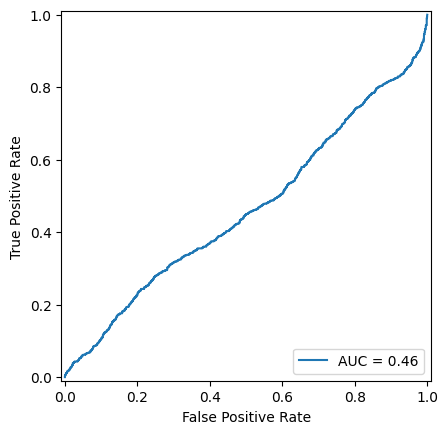

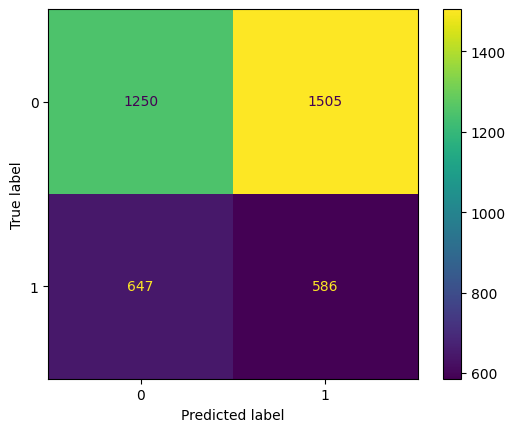

In [45]:
# Подбор порога по F1, precision@topK и важности признаков
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, proba)
print(f"Rows train/test: {len(train)}/{len(test)}  AUC: {auc:.4f}")

# построим график auc 
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_test, proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()   
# Найдем оптимальный порог со средними значения по всем классам
best_threshold = 0.025
# построим график матрицы ошибок
cm = confusion_matrix(y_test, proba > best_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
## Важность признаков
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

            Feature Id  Importances
0      days_from_birth    26.814571
1      contract_length    21.985005
2       contract_month    14.328121
3  sum_of_prev_credits    10.724313
4       marital_status     9.388505
5   contract_dayofweek     6.604985
6                  sex     3.773705
7    prev_credit_count     3.300558
8           birthplace     3.080237
